In [1]:
from keras.datasets import cifar10

In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 65s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_train[0].shape

(32, 32, 3)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

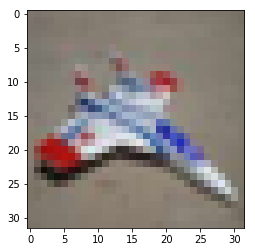

In [9]:
plt.imshow(x_train[30])

In [10]:
x_train.max()

255

In [11]:
x_train=x_train/255
x_test=x_test/255

In [12]:
x_test.shape

(10000, 32, 32, 3)

In [13]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [14]:
from keras.utils import to_categorical

In [15]:
y_cat_train=to_categorical(y_train,10)
y_cat_test=to_categorical(y_test,10)

In [18]:
from keras.models import Sequential

In [20]:
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [24]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

# no of naurons selected on the basis of powers of 2, 128,256,512
model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total para

In [26]:
model.fit(x_train,y_cat_train,verbose=1,epochs=10)

Epoch 1/10
50000/50000 [==============================] - 95s 2ms/step - loss: 1.5220 - acc: 0.4537
Epoch 2/10
50000/50000 [==============================] - 89s 2ms/step - loss: 1.1664 - acc: 0.5912
Epoch 3/10
50000/50000 [==============================] - 86s 2ms/step - loss: 1.0131 - acc: 0.6488
Epoch 4/10
50000/50000 [==============================] - 89s 2ms/step - loss: 0.9149 - acc: 0.6838
Epoch 5/10
50000/50000 [==============================] - 91s 2ms/step - loss: 0.8384 - acc: 0.7136
Epoch 6/10
50000/50000 [==============================] - 89s 2ms/step - loss: 0.7749 - acc: 0.7371
Epoch 7/10
50000/50000 [==============================] - 91s 2ms/step - loss: 0.7290 - acc: 0.7525
Epoch 8/10
50000/50000 [==============================] - 88s 2ms/step - loss: 0.6900 - acc: 0.7690
Epoch 9/10
50000/50000 [==============================] - 89s 2ms/step - loss: 0.6593 - acc: 0.7783
Epoch 10/10
50000/50000 [==============================] - 91s 2ms/step - loss: 0.6323 - acc: 0.7883

In [27]:
model.metrics_names

['loss', 'acc']

In [28]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 7s 676us/step


[1.2879155425071716, 0.6667]

In [29]:
from sklearn.metrics import classification_report

In [30]:
predictions=model.predict_classes(x_test)

In [31]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.77      0.71      0.74      1000
          1       0.90      0.68      0.77      1000
          2       0.50      0.70      0.58      1000
          3       0.45      0.50      0.47      1000
          4       0.71      0.53      0.60      1000
          5       0.48      0.69      0.56      1000
          6       0.81      0.69      0.75      1000
          7       0.82      0.62      0.71      1000
          8       0.82      0.75      0.78      1000
          9       0.74      0.80      0.77      1000

avg / total       0.70      0.67      0.67     10000

